In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def percent_scaling(series):
    return (series / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/cycle_cpu.csv')

cpu_df['cpu_percent'] = percent_scaling(cpu_df['cpu_percent'])
cpu_df['virtual_memory'] = percent_scaling(cpu_df['virtual_memory'])
cpu_df['adc_voltage_norm'] = min_max_scaling(cpu_df['adc_voltage'])

cpu_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-11 16:29:37.773772,0.255,0.253,0.127004,0.096321
1,2023-04-11 16:29:37.789659,0.143,0.253,0.101628,0.012402
2,2023-04-11 16:29:37.805657,0.000,0.253,0.109503,0.038446
3,2023-04-11 16:29:37.821604,0.143,0.253,0.101628,0.012402
4,2023-04-11 16:29:37.837489,0.000,0.253,0.100503,0.008681
...,...,...,...,...,...
8495,2023-04-11 16:31:55.293945,0.000,0.253,0.104128,0.020670
8496,2023-04-11 16:31:55.309834,0.000,0.253,0.105503,0.025217
8497,2023-04-11 16:31:55.325692,0.000,0.253,0.112378,0.047954
8498,2023-04-11 16:31:55.341620,0.143,0.253,0.102503,0.015296


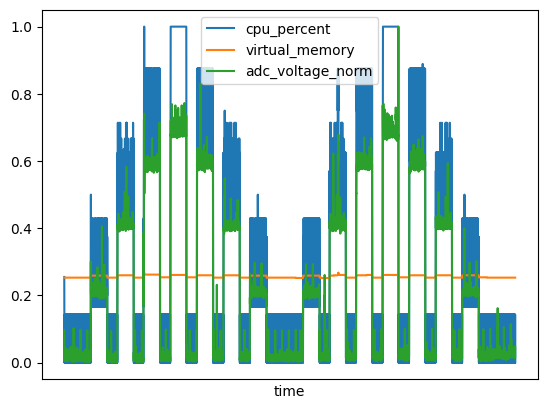

In [4]:
cpu_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [11]:
mem_df = pd.read_csv('../results/cycle_mem.csv')

mem_df['cpu_percent'] = percent_scaling(mem_df['cpu_percent'])
mem_df['virtual_memory'] = percent_scaling(mem_df['virtual_memory'])
mem_df['adc_voltage_norm'] = min_max_scaling(mem_df['adc_voltage'])

mem_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-11 16:42:11.932995,0.165,0.250,0.151005,0.184010
1,2023-04-11 16:42:11.955088,0.000,0.250,0.099128,0.008460
2,2023-04-11 16:42:11.971054,0.000,0.250,0.102378,0.019459
3,2023-04-11 16:42:11.987074,0.000,0.250,0.101378,0.016074
4,2023-04-11 16:42:12.002988,0.000,0.250,0.100253,0.012267
...,...,...,...,...,...
8495,2023-04-11 16:44:31.788538,0.000,0.189,0.100503,0.013113
8496,2023-04-11 16:44:31.804511,0.143,0.189,0.100253,0.012267
8497,2023-04-11 16:44:31.820675,0.000,0.189,0.100628,0.013536
8498,2023-04-11 16:44:31.836613,0.000,0.189,0.103503,0.023266


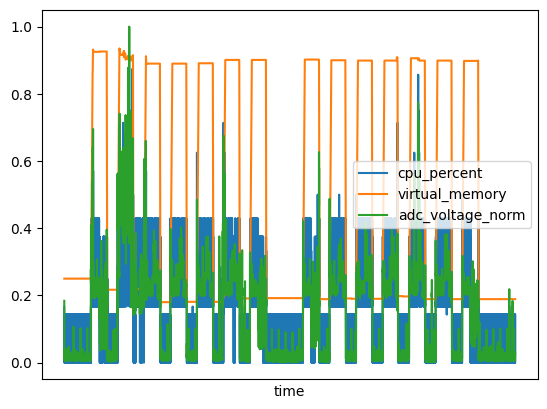

In [12]:
mem_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)